In [2]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
clinical_df = pd.read_csv(clinical_trial_data_to_load)


# Combine the data into a single dataset
combined_df = pd.merge(mouse_df, clinical_df, on= 'Mouse ID', how='outer')
combined_df = combined_df[['Mouse ID','Timepoint','Tumor Volume (mm3)','Metastatic Sites','Drug']]

# Display the data table for preview
combined_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,f234,0,45.000000,0,Stelasyn
1,f234,5,47.313491,0,Stelasyn
2,f234,10,47.904324,0,Stelasyn
3,f234,15,48.735197,1,Stelasyn
4,f234,20,51.112713,2,Stelasyn


## Tumor Response to Treatment

In [3]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_volume = combined_df.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].mean()
# Convert to DataFrame
mean_tumor_volume
# Preview DataFrame
mean_tumor_volume_df = mean_tumor_volume.to_frame().reset_index()
mean_tumor_volume_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
standard_error_tumor_volume = combined_df.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].sem()

# Convert to DataFrame

# Preview DataFrame
standard_error_tumor_volume_df = standard_error_tumor_volume.to_frame().reset_index()
standard_error_tumor_volume_df.head(5)


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [5]:
# Minor Data Munging to Re-Format the Data Frames

standard_error_tumor_volume_df = standard_error_tumor_volume_df.pivot(index= 'Timepoint', columns= 'Drug', values= 'Tumor Volume (mm3)')
standard_error1 = standard_error_tumor_volume_df['Capomulin']
standard_error2 = standard_error_tumor_volume_df['Infubinol']
standard_error3 = standard_error_tumor_volume_df['Ketapril']
standard_error4 = standard_error_tumor_volume_df['Placebo']

mean_tumor_volume_df = mean_tumor_volume_df.pivot(index= 'Timepoint', columns= 'Drug', values= 'Tumor Volume (mm3)')
mean_tumor_volume_df.head()
# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


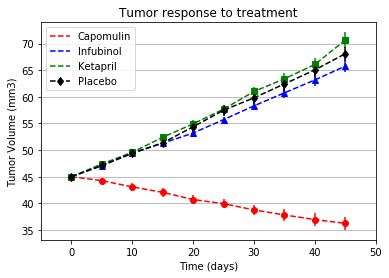

In [6]:

# Generate the Plot (with Error Bars)

fig, ax = plt.subplots()

tested_drug = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
yerr = [standard_error1, standard_error2, standard_error3, standard_error4]
colors= ['red', 'blue', 'green', 'black']
marker= ['o', '^', 's', 'd']
label =['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']

for i in range(len(label)):
    mean_tumor_volume_df.plot(ax=ax, y=tested_drug[i], yerr= yerr[i], colors= colors[i], 
                          marker= marker[i], label= label[i], linestyle= '--' )
    
plt.xlabel('Time (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor response to treatment')
plt.xlim(-5,50)
plt.grid(axis='y')





In [7]:
# Show the Figure
plt.show()
plt.savefig('Tumor Response to Treatment.png')

<Figure size 432x288 with 0 Axes>

In [8]:
print('Within the four tested drug (Capomulin, Infubinol, Ketapril, and Placebo), tumor volume decreased with Capomulin treatement.')


Within the four tested drug (Capomulin, Infubinol, Ketapril, and Placebo), tumor volume decreased with Capomulin treatement.


![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [9]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame

mean_Met_site = combined_df.groupby(['Drug','Timepoint'])['Metastatic Sites'].mean()
mean_Met_site_df = mean_Met_site.to_frame().reset_index()
mean_Met_site_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [10]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
# Convert to DataFrame
# Preview DataFrame
standard_error_Met_site = combined_df.groupby(['Drug','Timepoint'])['Metastatic Sites'].sem()
standard_error_Met_site_df = standard_error_Met_site.to_frame().reset_index()
standard_error_Met_site_df = standard_error_Met_site_df.pivot(index= 'Timepoint', columns= 'Drug', values= 'Metastatic Sites')
standard_error_Met_site_df.head()

standard_error_Met_site1 = standard_error_Met_site_df['Capomulin']
standard_error_Met_site2 = standard_error_Met_site_df['Infubinol']
standard_error_Met_site3 = standard_error_Met_site_df['Ketapril']
standard_error_Met_site4 = standard_error_Met_site_df['Placebo']



In [11]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked
mean_Met_site_df = mean_Met_site_df.pivot(index= 'Timepoint', columns= 'Drug', values= 'Metastatic Sites')
mean_Met_site_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


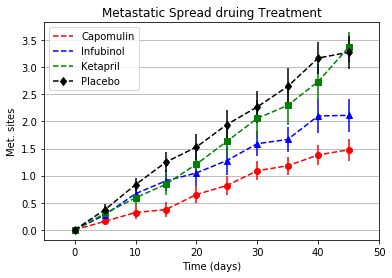

In [12]:
# Generate the Plot (with Error Bars)
# Save the Figure
# Show the Figure

fig1, ax = plt.subplots()

tested_drug = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
yerr = [standard_error_Met_site1,standard_error_Met_site2,standard_error_Met_site3,standard_error_Met_site4]
colors= ['red', 'blue', 'green', 'black']
marker= ['o', '^', 's', 'd']
label =['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']

for i in range(len(label)):
    mean_Met_site_df.plot(ax=ax, y=tested_drug[i], yerr= yerr[i], colors= colors[i], 
                          marker= marker[i], label= label[i], linestyle= '--' )
    
plt.xlabel('Time (days)')
plt.ylabel('Met. sites')
plt.title('Metastatic Spread druing Treatment')
plt.xlim(-5,50)
plt.grid(axis= 'y')



In [13]:
print('Within the four tested drug (Capomulin, Infubinol, Ketapril, and Placebo),\
there is no significant different effects on tumor metastatic spread during treatment. \
However, Capomulin treatment shows a lower rate of metastatic spread.' )


Within the four tested drug (Capomulin, Infubinol, Ketapril, and Placebo),there is no significant different effects on tumor metastatic spread during treatment. However, Capomulin treatment shows a lower rate of metastatic spread.


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [14]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
# Convert to DataFrame
# Preview DataFrame

count_mouse = combined_df.groupby(['Drug','Timepoint'])['Mouse ID'].count()
count_mouse
count_mouse_df = count_mouse.to_frame().reset_index()
count_mouse_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [15]:
# Minor Data Munging to Re-Format the Data Frames
# Preview the Data Frame
count_mouse_df = count_mouse_df.pivot(index= 'Timepoint', columns= 'Drug', values= 'Mouse ID')

tested_drug = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
for i in range(len(tested_drug)):
    count_mouse_df[tested_drug[i]] = count_mouse_df[tested_drug[i]] / 25 * 100

count_mouse_df.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,25,100.0,100.0,25,100.0,26,25,26,25
5,100.0,21,100.0,92.0,23,96.0,25,25,25,24
10,100.0,20,84.0,88.0,21,96.0,23,24,23,22
15,96.0,19,84.0,76.0,21,80.0,17,24,23,21
20,92.0,18,80.0,76.0,20,76.0,17,23,21,17


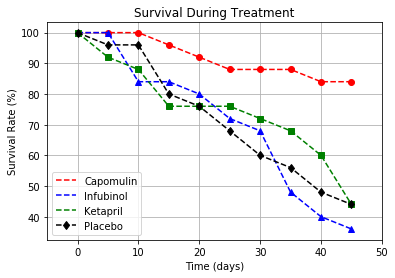

<Figure size 432x288 with 0 Axes>

In [16]:
# Generate the Plot (Accounting for percentages)
# Save the Figure
# Show the Figure

fig2, ax = plt.subplots()

tested_drug = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
yerr = [standard_error_Met_site1,standard_error_Met_site2,standard_error_Met_site3,standard_error_Met_site4]
colors= ['red', 'blue', 'green', 'black']
marker= ['o', '^', 's', 'd']
label =['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']

for i in range(len(label)):
    count_mouse_df.plot(ax=ax, y=tested_drug[i], yerr= yerr[i], colors= colors[i], 
                          marker= marker[i], label= label[i], linestyle= '--' )
    
plt.xlabel('Time (days)')
plt.ylabel('Survival Rate (%)')
plt.title('Survival During Treatment')
plt.xlim(-5,50)
plt.grid()


plt.show()
plt.savefig('Survival During Treatment.png')

In [17]:
print('In the survival experiment within four tested drugs, \
capomulin shows a sifnificant higher survival rate during treatment compared to other three drugs.')

In the survival experiment within four tested drugs, capomulin shows a sifnificant higher survival rate during treatment compared to other three drugs.


![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [18]:
# Calculate the percent changes for each drug

# Display the data to confirm

column_length = len(count_mouse_df['Capomulin']) -1
tested_drug = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
for i in range(len(tested_drug)):
    pct_change_Capomulin = (mean_tumor_volume_df.iloc[column_length,0] - mean_tumor_volume_df.iloc[0,0])/mean_tumor_volume_df.iloc[0,0] * 100
    pct_change_Infubinol = (mean_tumor_volume_df.iloc[column_length,2] - mean_tumor_volume_df.iloc[0,2])/mean_tumor_volume_df.iloc[0,2] * 100
    pct_change_Ketapril = (mean_tumor_volume_df.iloc[column_length,3] - mean_tumor_volume_df.iloc[0,3])/mean_tumor_volume_df.iloc[0,3] * 100
    pct_change_Placebo = (mean_tumor_volume_df.iloc[column_length,5] - mean_tumor_volume_df.iloc[0,5])/mean_tumor_volume_df.iloc[0,5] * 100
  
    
print(pct_change_Capomulin)    
print(pct_change_Infubinol)    
print(pct_change_Ketapril)  
print(pct_change_Placebo)

-19.475302667894173
46.12347172785187
57.028794686606076
51.29796048315153


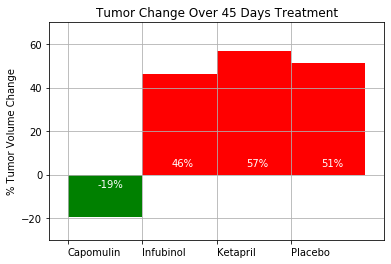

In [19]:
# Store all Relevant Percent Changes into a Tuple
percentage_change = (pct_change_Capomulin,pct_change_Infubinol,pct_change_Ketapril,pct_change_Placebo)


# Splice the data between passing and failing drugs
drug_percentage_change = {'Percentage Change':percentage_change,
                          'Drug':tested_drug}
drug_percentage_change
df = pd.DataFrame(drug_percentage_change)


bins = [-100,0,100]
group_name = ['Pass', 'Fail']
colors = {'Pass': 'green',
          'Fail': 'red'}
df['Pass or Fail'] = pd.cut(df['Percentage Change'], bins, labels=group_name)


# Orient widths. Add labels, tick marks, etc. 
# df['Percentage Change'] = df['Percentage Change'].map("{:.0f}%".format)
# df

fig3, ax = plt.subplots()
x_value = np.arange(len(df))
colormap=np.where(df['Percentage Change']>0, 'r','g')

df.plot(ax=ax, kind='bar', align='edge', x='Drug', y='Percentage Change', legend=False, width=1,color=colormap,\
        title='Tumor Change Over 45 Days Treatment')

plt.xticks(rotation='horizontal', horizontalalignment='left')
plt.xlabel('')
plt.ylabel('% Tumor Volume Change')
plt.grid(which='major')
plt.ylim(-30,70)

formated = []
formated = df['Percentage Change'].map('{:.0f}%'.format)
formated[0]

for i in range(4):
    if i==0:
        ax.annotate(formated[i], xy=(0.4,-8),xytext=(0.4,-6), color='white')
    elif i!=0:  
        ax.annotate(formated[i], xy=(i+0.4,4),xytext=(i+0.4,4), color='white')
    










# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure
plt.savefig('Tumor_change_over_45_days_treatment.png')

# Show the Figure
fig.show()

In [20]:
print('Among the four tested drugs, capomulin decreased tumor volume over 45 days treatment (-19%), but not other three drugs.')

Among the four tested drugs, capomulin decreased tumor volume over 45 days treatment (-19%), but not other three drugs.


![Metastatic Spread During Treatment](../Images/change.png)